# Examine Trained RNN Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import motion, path_rnn

In [2]:
# Directory where test data is loaded from
TEST_DATA_DIR = 'data/sim_2022_04_19_polar'

# Path where model is saved
MODEL_FPATH = 'models/test_2022_04_20_01.pt'

# Number of units in RNN
NUM_UNITS = 100

## Load test data

In [3]:
sim_params, vel, pos = motion.load_simulation_results(TEST_DATA_DIR)

## Load model

In [4]:
model = path_rnn.PathRNN(n_units=NUM_UNITS)
model.load_state_dict(torch.load(MODEL_FPATH))
model.eval();

## Run model on all trials

In [5]:
# Convert velocity array to Tensor in order to run model
vel_t = torch.Tensor(vel)

# Predict estimated position
pos_est_t, u_vals_t = model(vel_t)

# Convert estimated position back to Numpy array
pos_est = pos_est_t.detach().numpy()
u_vals = u_vals_t.detach().numpy()

## Plot results

In [6]:
if sim_params['boundary_type'] == 'square':
    boundary = motion.SquareBoundary(sim_params['boundary_height'])
else:
    raise ValueError(f'Boundary not supported.')

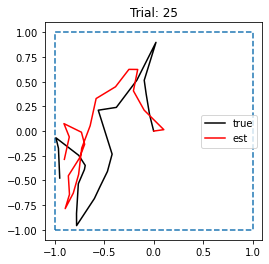

In [16]:
trial_plt = 25
t_start = 0
t_stop = 20

pos_plt = pos[trial_plt][t_start:t_stop]
pos_est_plt = pos_est[trial_plt][t_start:t_stop]

fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
ax.set_title(f'Trial: {trial_plt}')
motion.plot_position_estimate(boundary, pos_plt, pos_est_plt, ax)

plt.savefig('test_model_04_20.png')

## Check for bias in initial position

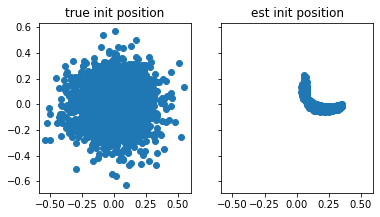

In [8]:
# True initial positions
x0 = pos[:, 0, 0]
y0 = pos[:, 0, 1]

# Estimated initial positions
x0_est = pos_est[:, 0, 0]
y0_est = pos_est[:, 0, 1]

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

ax[0].scatter(x0, y0)
ax[0].set_title('true init position')
ax[0].set_aspect(1.0)

ax[1].scatter(x0_est, y0_est)
ax[1].set_title('est init position')
ax[1].set_aspect(1.0)

plt.savefig('init_position_compare.png')

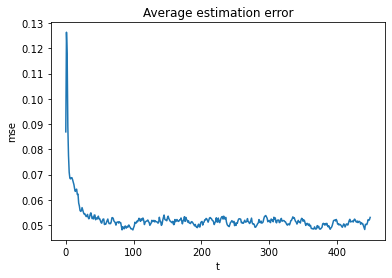

In [9]:
sq_err = np.sum((pos_est - pos) ** 2, axis=2)
mse = np.mean(sq_err, axis=0)
plt.plot(mse)
plt.title('Average estimation error')
plt.xlabel('t')
plt.ylabel('mse')

plt.savefig('avg_error.png')

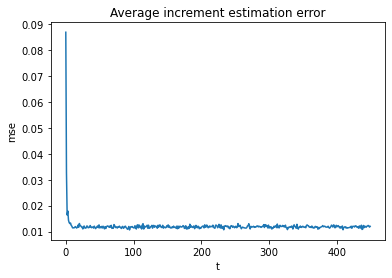

In [10]:
dpos = np.diff(pos, axis=1, prepend=0)
dpos_est = np.diff(pos_est, axis=1, prepend=0)

sq_err = np.sum((dpos_est - dpos) ** 2, axis=2)
mse = np.mean(sq_err, axis=0)
plt.plot(mse)
plt.title('Average increment estimation error')
plt.xlabel('t')
plt.ylabel('mse')

plt.savefig('inc_error.png')

In [13]:
for name, param in model.named_parameters():
    if name == 'rnn.bias_hh_l0':
        print(param)

Parameter containing:
tensor([ 0.0110, -0.0051, -0.0132,  0.0045,  0.0119,  0.0006, -0.0044,  0.1175,
        -0.0012, -0.0371, -0.0259, -0.0015,  0.0042, -0.0009,  0.0321,  0.0041,
         0.0235,  0.0604, -0.0143,  0.0171,  0.0188, -0.0236,  0.0453,  0.0174,
         0.0401,  0.0170,  0.0050,  0.0298,  0.0647,  0.0624, -0.0114, -0.0140,
        -0.0266, -0.0309, -0.0336,  0.0841,  0.0183,  0.0237, -0.0090, -0.0292,
         0.0194,  0.0041,  0.0039,  0.0405, -0.0120, -0.0024,  0.0280,  0.1131,
         0.0741,  0.0007,  0.0225, -0.0118,  0.0377,  0.0227,  0.0818,  0.0509,
         0.0139, -0.0246,  0.0152,  0.0811, -0.0029,  0.0083, -0.0034, -0.0089,
        -0.1035,  0.0176, -0.0002, -0.0279, -0.0248, -0.0067, -0.0051, -0.0182,
         0.0502,  0.0114,  0.0130, -0.0257, -0.0465,  0.0173,  0.0023,  0.0056,
         0.0383,  0.0274, -0.0379,  0.0238, -0.0070, -0.0336,  0.0073,  0.0300,
         0.0472,  0.0533,  0.0512, -0.0022, -0.0189,  0.0170, -0.0018, -0.0496,
         0.1192,  

In [12]:
u_vals[0][0]

array([ 0.36897033, -0.48781183, -0.24243903,  0.11201087, -0.08554522,
        0.81140536, -0.3953    ,  0.44534665,  0.46783042,  0.38884857,
       -0.14812233, -0.48196697,  0.5414778 , -0.03448984, -0.5744601 ,
       -0.29730862, -0.34532034, -0.9310908 , -0.35989937, -0.4026114 ,
       -0.14495015,  0.35435092, -0.7349285 , -0.4692436 ,  0.8640177 ,
       -0.18655184, -0.5688564 , -0.44938725,  0.9510726 , -0.6801576 ,
        0.5011526 ,  0.08697206, -0.24150215,  0.37875128, -0.28874344,
       -0.9041015 ,  0.61996055, -0.16197911, -0.18767577,  0.15453312,
       -0.51023763, -0.1403839 ,  0.15152103,  0.39854208,  0.3571872 ,
       -0.7993029 ,  0.11018512,  0.96310717,  0.90093935,  0.7479265 ,
       -0.26677036,  0.630246  , -0.9381097 , -0.4113132 ,  0.8977089 ,
       -0.5951095 , -0.6786948 , -0.79934794, -0.2995888 ,  0.8067018 ,
       -0.40533224, -0.27612987,  0.41490865,  0.3015131 , -0.7650137 ,
       -0.35900277, -0.88921684,  0.1650659 ,  0.14484757,  0.72